In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Used_Cars_Dataset.csv", encoding='ISO-8859-1')

In [7]:
print("=== Initial Data Info ===")
df.info()

=== Initial Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          11111 non-null  object
 1   name                 11111 non-null  object
 2   seller               11111 non-null  object
 3   offerType            11111 non-null  object
 4   price                11111 non-null  int64 
 5   abtest               11111 non-null  object
 6   vehicleType          9906 non-null   object
 7   yearOfRegistration   11111 non-null  int64 
 8   gearbox              10500 non-null  object
 9   powerPS              11111 non-null  int64 
 10  model                10531 non-null  object
 11  kilometer            11111 non-null  int64 
 12  monthOfRegistration  11111 non-null  int64 
 13  fuelType             10073 non-null  object
 14  brand                11111 non-null  object
 15  notRepairedDamage    8939 n

In [9]:
print("Initial Data Description")
print(df.describe())

Initial Data Description
               price  yearOfRegistration       powerPS      kilometer  \
count   11111.000000        11111.000000  11111.000000   11111.000000   
mean     5827.843488         2003.500225    113.289083  125599.405994   
std     10586.935569           11.379406    105.800724   40118.532696   
min         0.000000         1111.000000      0.000000    5000.000000   
25%      1149.500000         1999.000000     69.000000  125000.000000   
50%      2990.000000         2004.000000    105.000000  150000.000000   
75%      7300.000000         2008.000000    150.000000  150000.000000   
max    579000.000000         2018.000000   7515.000000  150000.000000   

       monthOfRegistration  nrOfPictures    postalCode  
count         11111.000000       11111.0  11111.000000  
mean              5.734137           0.0  50671.574656  
std               3.719081           0.0  25877.073116  
min               0.000000           0.0   1067.000000  
25%               3.000000      

In [13]:
print("Initial Missing Values Count")
print(df.isnull().sum())

Initial Missing Values Count
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            1205
yearOfRegistration        0
gearbox                 611
powerPS                   0
model                   580
kilometer                 0
monthOfRegistration       0
fuelType               1038
brand                     0
notRepairedDamage      2172
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64


In [15]:
print(df.shape)
print(df.dtypes)
df.head()

(11111, 20)
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,24-03-2016 00:00,0,70435,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,24-03-2016 00:00,0,66954,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,14-03-2016 00:00,0,90480,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,17-03-2016 00:00,0,91074,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,31-03-2016 00:00,0,60437,06-04-2016 10:17


In [17]:
drop_cols = ["dateCrawled", "dateCreated", "lastSeen", "name", "nrOfPictures", "postalCode"]
df.drop(columns=drop_cols, errors='ignore', inplace=True)

In [19]:
for col in ['vehicleType', 'gearbox', 'model', 'fuelType', 'notRepairedDamage']:
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
df.dropna(inplace=True)

In [21]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [23]:
print("Data Info After Initial Preprocessing")
df.info()

print("Missing Values After Preprocessing")
print(df.isnull().sum())

Data Info After Initial Preprocessing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11111 entries, 0 to 11110
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   seller               11111 non-null  int32
 1   offerType            11111 non-null  int32
 2   price                11111 non-null  int64
 3   abtest               11111 non-null  int32
 4   vehicleType          11111 non-null  int32
 5   yearOfRegistration   11111 non-null  int64
 6   gearbox              11111 non-null  int32
 7   powerPS              11111 non-null  int64
 8   model                11111 non-null  int32
 9   kilometer            11111 non-null  int64
 10  monthOfRegistration  11111 non-null  int64
 11  fuelType             11111 non-null  int32
 12  brand                11111 non-null  int32
 13  notRepairedDamage    11111 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 824.8 KB
Missing Values After Preprocessing


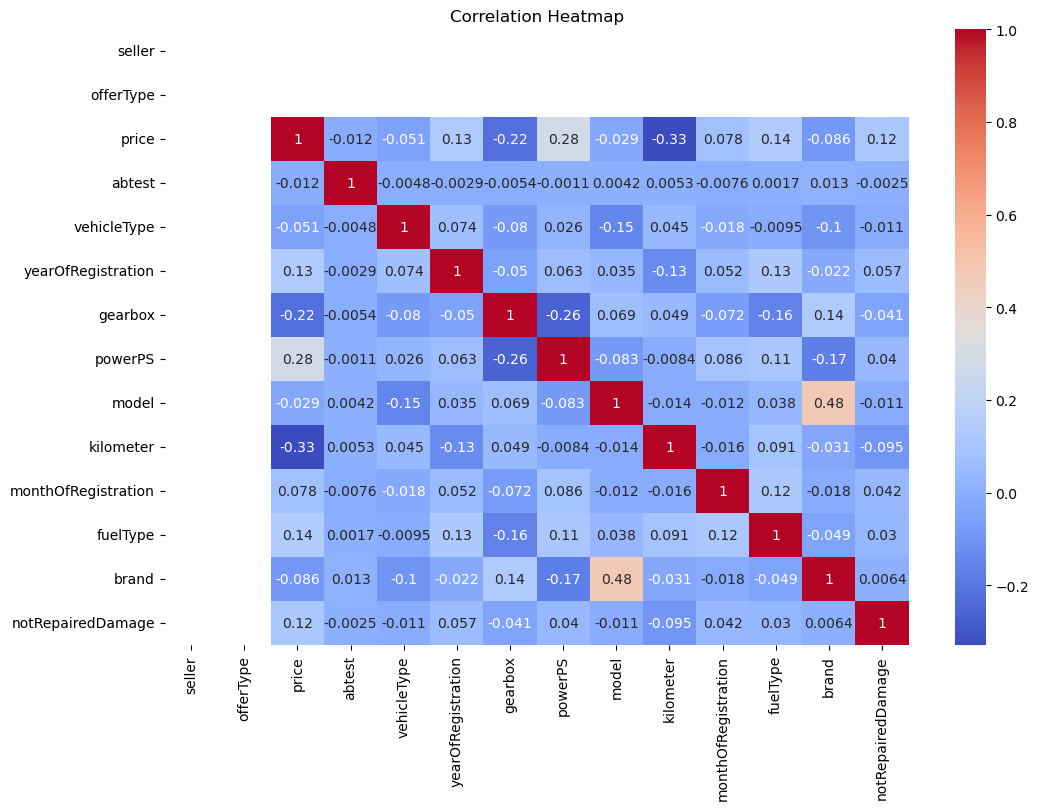

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

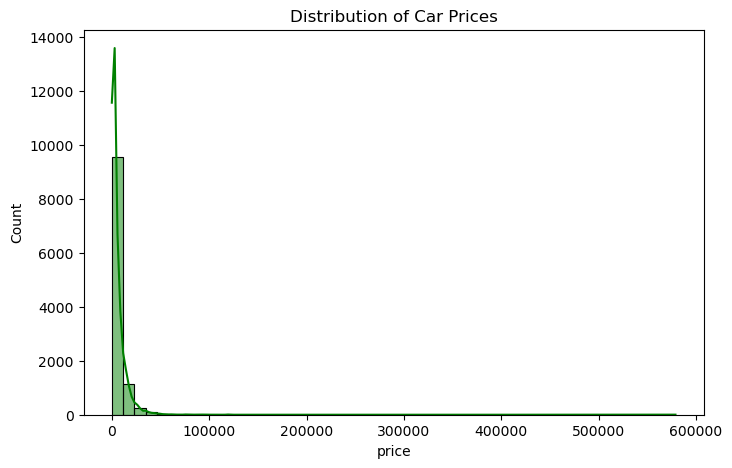

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title("Distribution of Car Prices")
plt.show()

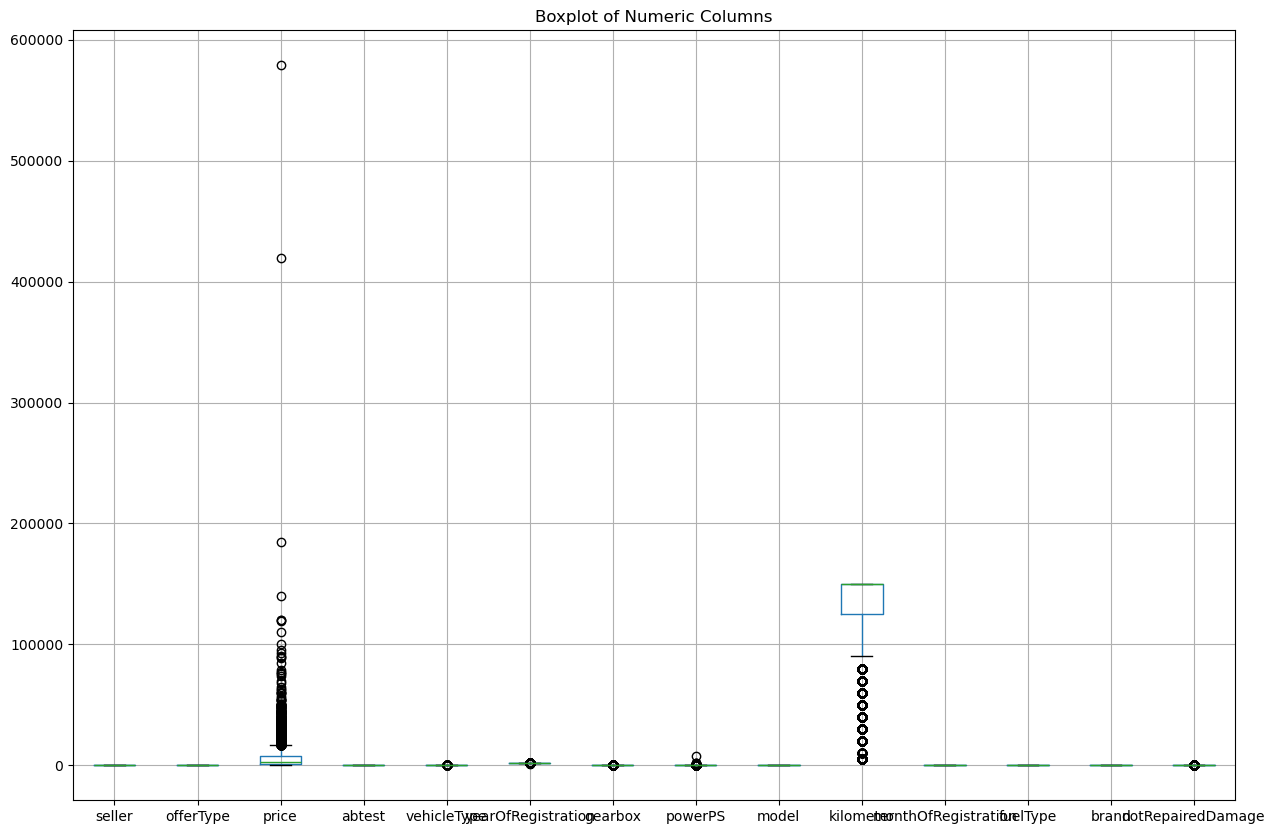

In [29]:
plt.figure(figsize=(15, 10))
df.select_dtypes(include=np.number).boxplot()
plt.title("Boxplot of Numeric Columns")
plt.show()

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.reset_index(drop=True, inplace=True)

In [33]:
X = df_clean.drop("price", axis=1)
y = df_clean["price"]

selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['abtest', 'vehicleType', 'yearOfRegistration', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage']


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    })

In [40]:
results_df_clean = pd.DataFrame(results).sort_values("R2", ascending=False)
print(results_df_clean)

               Model          MAE           MSE         RMSE        R2
3  Gradient Boosting  1024.483752  2.376259e+06  1541.512067  0.767710
2      Random Forest  1069.110123  2.720541e+06  1649.406132  0.734055
1      Decision Tree  1438.123634  4.960501e+06  2227.218329  0.515089
0  Linear Regression  1701.298068  5.652331e+06  2377.463128  0.447460
4                SVR  2185.638112  1.081378e+07  3288.431337 -0.057094


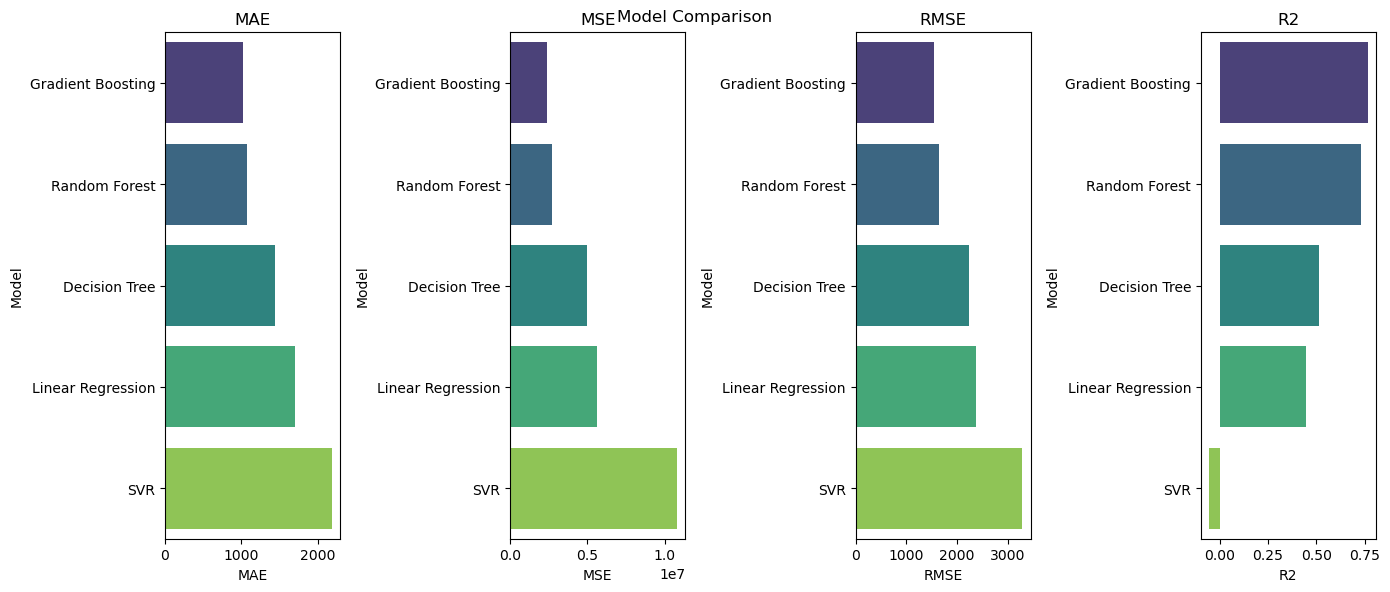

In [41]:
plt.figure(figsize=(14, 6))
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i+1)
    sns.barplot(data=results_df_clean, x=metric, y='Model', palette='viridis')
    plt.title(metric)
    plt.tight_layout()
plt.suptitle("Model Comparison")
plt.show()

In [42]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10, 20]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'model__max_depth': 10, 'model__n_estimators': 100}
Best Score: 0.7422319568617922


In [43]:
joblib.dump(grid.best_estimator_, 'best_model.pkl')


['best_model.pkl']

In [46]:
model = joblib.load('best_model.pkl')
y_pred = model.predict(X_test)